In [1]:
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv('BostonHousing.csv')

In [4]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.shape

(506, 14)

In [6]:
# Null values
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# Assume the target column is named 'MEDV'
X = data.drop("medv", axis=1)
Y = data["medv"]

In [9]:
# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [11]:
# Build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

D:\SK\Programs\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [13]:
# Display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - loss: 285.3889 - mae: 12.6728 - val_loss: 24.0045 - val_mae: 3.0623
Epoch 2/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 19.1650 - mae: 3.2424 - val_loss: 18.2616 - val_mae: 2.8299
Epoch 3/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 19.7456 - mae: 3.2662 - val_loss: 15.3268 - val_mae: 2.6786
Epoch 4/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 15.3205 - mae: 2.7768 - val_loss: 12.8830 - val_mae: 2.4055
Epoch 5/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 15.6789 - mae: 2.6743 - val_loss: 14.5477 - val_mae: 2.5977
Epoch 6/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 10.2896 - mae: 2.4339 - val_loss: 15.9464 - val_mae: 2.8971
Epoch 7/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 14.1381 - mae: 2.7514 - val_loss: 10.9462 - val_mae: 2.1594
Epoch 8/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 10.5494 - mae: 2.4277 - val_loss: 12.9377 - val_mae: 2.5085
Epoch 9/100
404/404 ━━━━━

In [15]:
# Evalute the model
mse = model.evaluate(X_test, Y_test)
print("Mean Squared Error:", mse)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 7.8527 - mae: 1.9978
Mean Squared Error: [9.926465034484863, 2.0753276348114014]


In [16]:
# Show Sample Predictions
y_pred = model.predict(X_test)
print(y_pred[:5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[29.898926]
 [32.692245]
 [15.774675]
 [23.55191 ]
 [16.687815]]


In [17]:
print(Y_test[:5])

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: medv, dtype: float64


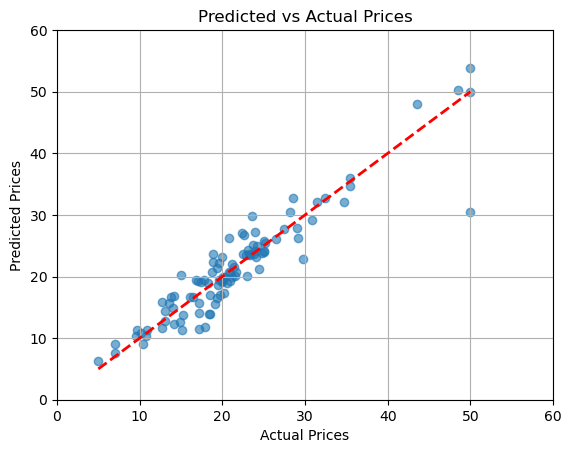

In [18]:
# Visualizing Predicted vs Actual Pricesplt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.grid()
plt.show()